In [1]:
# COVID-19 Project 

In [2]:
# Load the required libraries and the data.
import pandas as pd
import yellowbrick


# Step 1:  Load data into a dataframe
data = pd.read_csv('covid.csv')

In [3]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (251, 12)


In [4]:
#Step 3:  Look at the data
print(data.head(5))

   OBJECTID             DATE  Age_0_to_9  Age_10_to_19  Age_20_to_29  \
0         1  3/29/2020 10:00           4            21           165   
1         2  3/30/2020 10:00           5            27           188   
2         3  3/31/2020 10:00           6            32           215   
3         4   4/1/2020 10:00           6            39           252   
4         5   4/2/2020 10:00           9            46           286   

   Age_30_to_39  Age_40_to_49  Age_50_to_59  Age_60_to_69  Age_70_to_79  \
0           203           241           243           191           117   
1           247           262           274           219           139   
2           290           304           335           260           157   
3           345           372           396           309           187   
4           410           437           471           357           217   

   Age_80plus  Age_Unknown  
0          54          NaN  
1          53          NaN  
2          61          NaN  


In [5]:
# Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
         OBJECTID   Age_0_to_9  Age_10_to_19  Age_20_to_29  Age_30_to_39  \
count  251.000000   251.000000    251.000000    251.000000    251.000000   
mean   126.000000  3150.760956   6567.358566  15732.609562  16291.123506   
std     72.601653  2272.537924   5118.562940  10484.511429   9291.781336   
min      1.000000     4.000000     21.000000    165.000000    203.000000   
25%     63.500000  1263.500000   2291.500000   7249.500000   9743.000000   
50%    126.000000  2992.000000   5536.000000  15427.000000  16837.000000   
75%    188.500000  4737.000000  10819.500000  23946.000000  22814.500000   
max    251.000000  8785.000000  18587.000000  39694.000000  37254.000000   

       Age_40_to_49  Age_50_to_59  Age_60_to_69  Age_70_to_79   Age_80plus  \
count    251.000000    251.000000    251.000000    251.000000   251.000000   
mean   14705.876494  13418.685259   9194.601594   5580.756972  4630.358566   
std     7960.260718   7324.048222   4768.866145   2693.351309  2002

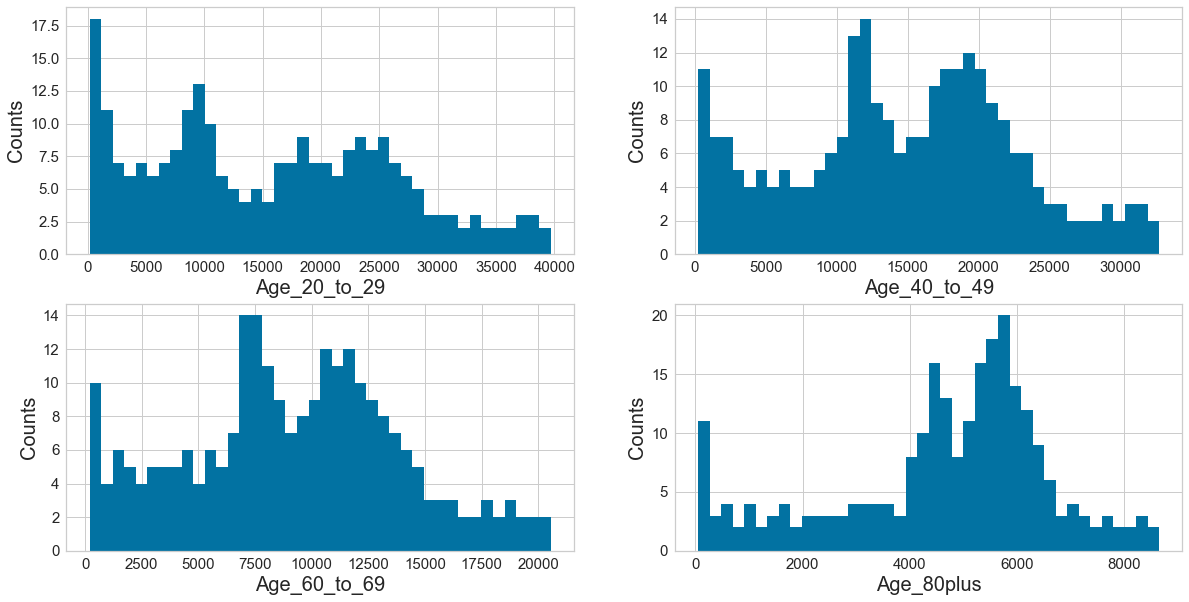

In [8]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age_20_to_29', 'Age_40_to_49', 'Age_60_to_69', 'Age_80plus']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()

C:\Users\cherf001\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


array([[  165,   241,   191,    54],
       [  188,   262,   219,    53],
       [  215,   304,   260,    61],
       ...,
       [38682, 31883, 19914,  8406],
       [39050, 32185, 20120,  8516],
       [39694, 32739, 20549,  8664]], dtype=int64)

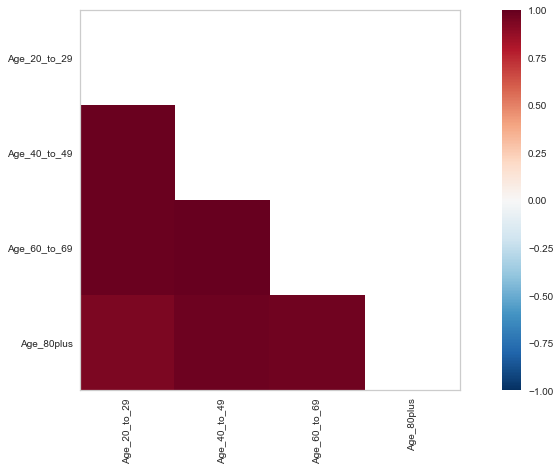

In [9]:
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
#plt.show()

In [10]:
# Determine the Pearson correlation between variables Age_20_to_29 and Age_40_to_49 
# Import those libraries 
import pandas as pd 
from scipy.stats import pearsonr 
  
# Import your data into Python 
df = pd.read_csv("covid.csv") 
  
# Convert dataframe into series 
list1 = df['Age_20_to_29'] 
list2 = df['Age_40_to_49'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: 0.991


In [11]:
# # Determine the Pearson correlation between variables Age_80plus and Age_20_to_29
# Import those libraries 
import pandas as pd 
from scipy.stats import pearsonr 
  
# Import your data into Python 
df = pd.read_csv("covid.csv") 
  
# Convert dataframe into series 
list1 = df['Age_80plus'] 
list2 = df['Age_20_to_29'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: 0.941


In [12]:
# # Determine the Pearson correlation between variables Age_80plus and Age_20_to_29. Check this one bc it gives the
# correlation value for 1 variable.
# Import those libraries 
import pandas as pd 
from scipy.stats import pearsonr 
  
# Import your data into Python 
df = pd.read_csv("covid.csv") 
  
# Convert dataframe into series 
list1 = df['Age_80plus'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: 0.941


In [13]:
# # Determine the Pearson correlation between variables Age_80plus and Age_20_to_29
# Import those libraries 
import pandas as pd 
from scipy.stats import pearsonr 
  
# Import your data into Python 
df = pd.read_csv("covid.csv") 
  
# Convert dataframe into series 
list1 = df['Age_20_to_29'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000
